In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from jupyterthemes import jtplot
# jtplot.style()
#jtplot.reset()

In [240]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_gender_submission = pd.read_csv('./input/gender_submission.csv')

In [241]:
print("df_train:{}".format(df_train.shape))
print(df_train.columns)
print()
print("df_test:{}".format(df_test.shape))
print(df_test.columns)
print()
print("df_gender_submission:{}".format(df_gender_submission.shape))

df_train:(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

df_test:(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

df_gender_submission:(418, 2)


In [242]:
df_train.info()
print()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null floa

In [243]:
df_train.head()
# Embarked は出港場所

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 欠損値の確認

In [244]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 要約統計量

In [245]:
# df_trainとdf_testを連結
df_full = pd.concat([df_train, df_test], axis=0, ignore_index=True) # index 0から振り直す
display(df_full.iloc[891:900])
# Nanの個数
df_full["Survived"].isnull().sum()

print(df_full.shape)
df_full.describe() # df_fullの要約統計量

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
891,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
892,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
893,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
894,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
895,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298
896,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538
897,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972
898,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738
899,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657


(1309, 12)


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [246]:
df_full.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [247]:
df_train.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9]) # 数値型の情報

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [248]:
df_full.describe(include='O') # Object型の要素数、ユニーク数、最頻値、最頻値の出現回数

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


## 死亡者と生存者の可視化

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

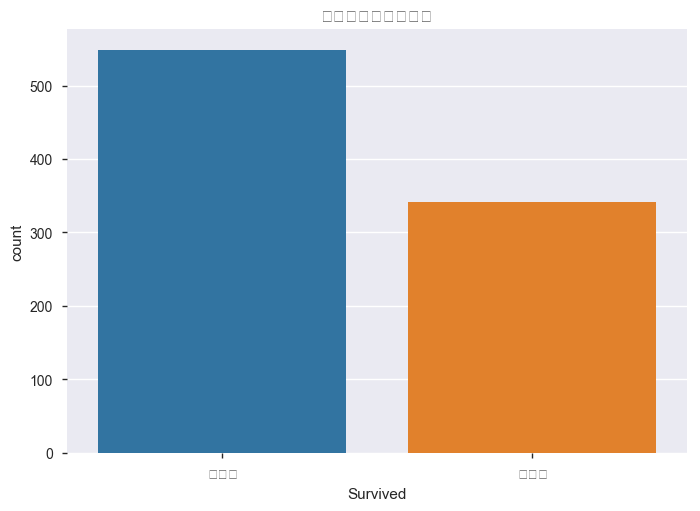

In [249]:
sns.countplot(x='Survived', data=df_train)
plt.title('死亡者と生存者の数') 
plt.xticks([0,1], ['死亡者', '生存者'])
plt.show()
display(df_train['Survived'].value_counts())
display(df_train['Survived'].value_counts()/len(df_train['Survived']))

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Survived,0,1
Sex,,
female,81,233
male,468,109


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


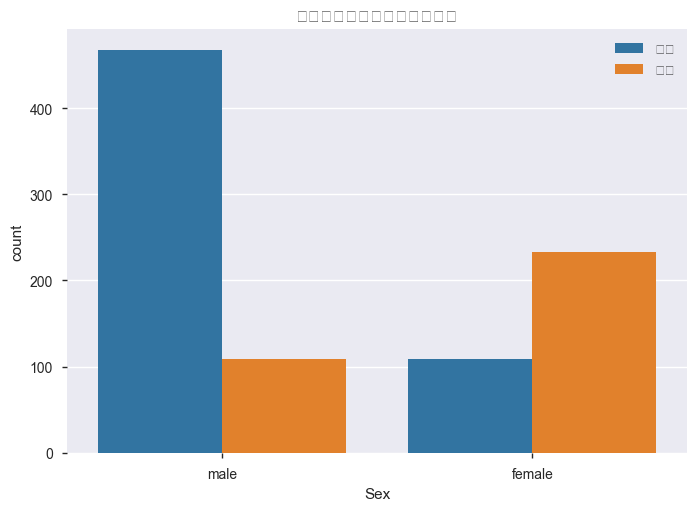

In [250]:
sns.countplot(x='Survived', hue='Sex', data=df_train) # hueは内側
plt.xticks([0,1], ['死亡者', '生存者'])
plt.title('男女別の死亡者と生存者の数')
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title('男女別の死亡者と生存者の数')
plt.legend(['死亡', '生存'])
plt.show()
#rename = lambda x: '生存' if x ==1 else '死亡'
#df_train['Survived']=[rename(i) for i in df_train['Survived'] ]
df_train['Survived']=[i for i in df_train['Survived'] ]
display(pd.crosstab(df_train['Sex'], df_train['Survived']))

display(pd.crosstab(df_train['Sex'], df_train['Survived'], normalize='index'))

## チケットクラス別

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


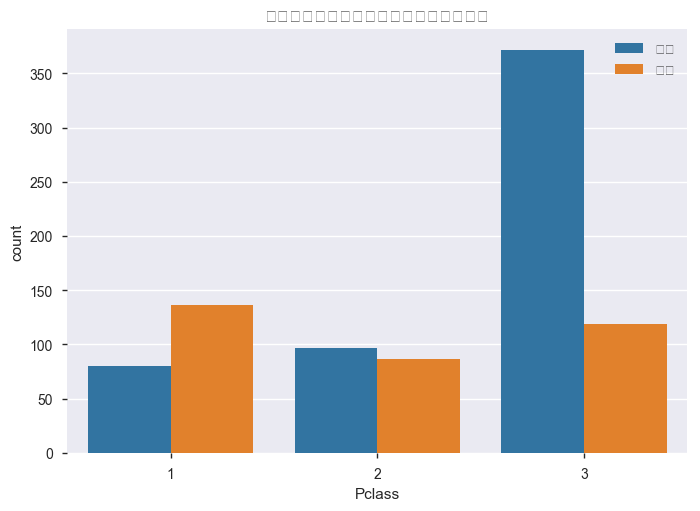

In [251]:
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('チケットクラス別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.show()
display(pd.crosstab(df_train['Pclass'], df_train['Survived']))
display(pd.crosstab(df_train['Pclass'], df_train['Survived'], normalize='index'))

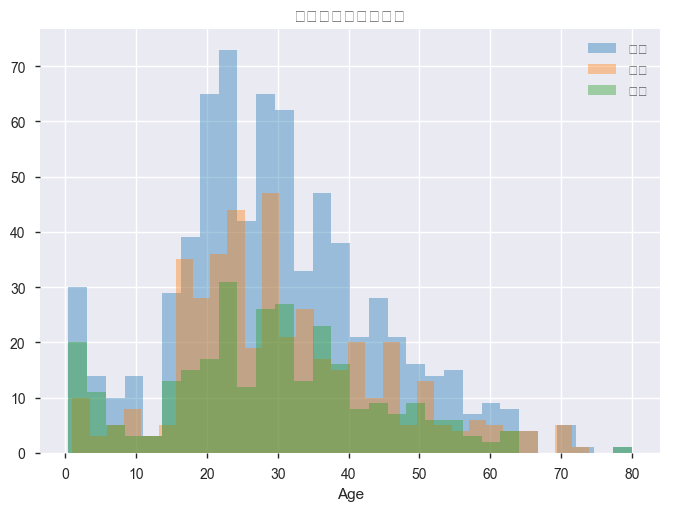

In [252]:
sns.distplot(df_train['Age'].dropna(),kde=False, bins=30) # kdeは近似関数を表示するか
sns.distplot(df_train[df_train['Survived']==0].Age.dropna(), kde=False,bins=30)
sns.distplot(df_train[df_train['Survived']==1].Age.dropna(), kde=False, bins=30)
plt.title("乗車船の年齢の分布")
plt.legend(["全体","死亡","生存"])

In [253]:
df_train['CategoricalAge']=pd.cut(df_train['Age'], 8)
display(pd.crosstab(df_train['CategoricalAge'], df_train['Survived']))
display(pd.crosstab(df_train['CategoricalAge'], df_train['Survived'], normalize=True))

Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",26,38
"(10.368, 20.315]",71,44
"(20.315, 30.263]",146,84
"(30.263, 40.21]",86,69
"(40.21, 50.158]",53,33
"(50.158, 60.105]",25,17
"(60.105, 70.052]",13,4
"(70.052, 80.0]",4,1


Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",0.036415,0.053221
"(10.368, 20.315]",0.099440,0.061625
"(20.315, 30.263]",0.204482,0.117647
"(30.263, 40.21]",0.120448,0.096639
"(40.21, 50.158]",0.074230,0.046218
"(50.158, 60.105]",0.035014,0.023810
"(60.105, 70.052]",0.018207,0.005602
"(70.052, 80.0]",0.005602,0.001401


## 兄弟・配偶者の数

Text(0.5, 1.0, '同乗している兄弟・配偶者の数')

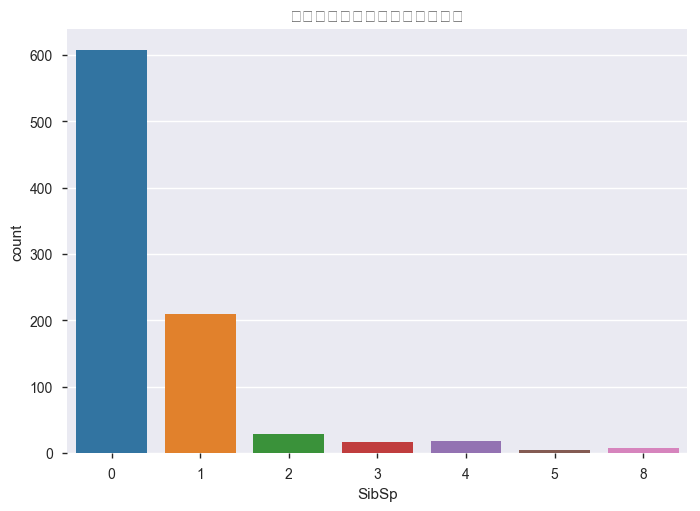

In [254]:
sns.countplot(x='SibSp', data=df_train)
plt.title('同乗している兄弟・配偶者の数')

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Survived,0,1
SibSp_0_1_2over,,
0,398,210
1,97,112
2,54,20


Survived,0,1
SibSp_0_1_2over,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.729730,0.270270


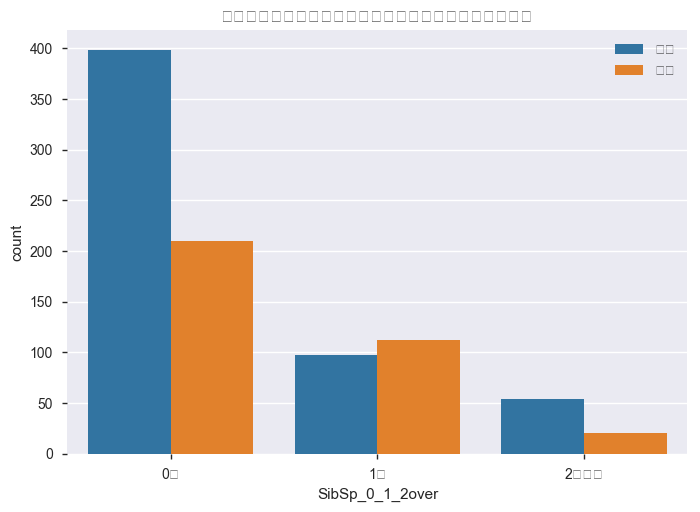

In [255]:
df_train['SibSp_0_1_2over']=[i  if i<=1 else 2 for i in df_train['SibSp']]
df_test['SibSp_0_1_2over']=[i  if i<=1 else 2 for i in df_test['SibSp']]
sns.countplot(x='SibSp_0_1_2over', hue='Survived', data=df_train)
plt.legend(['死亡', '生存'])
plt.xticks([0,1,2],['0人', '1人', '2人以上'])
plt.title('同情している兄弟・配偶者の数別の死亡者と生存者の数')
plt.show()

display(pd.crosstab(df_train['SibSp_0_1_2over'], df_train['Survived']))
display(pd.crosstab(df_train['SibSp_0_1_2over'], df_train['Survived'], normalize='index'))

In [256]:
## 両親・子供の数

Text(0.5, 1.0, '同乗している両親・子供の数')

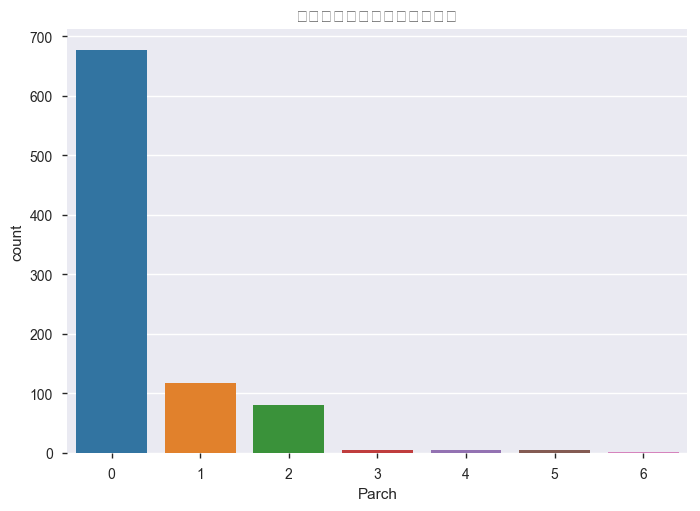

In [257]:
sns.countplot(x='Parch', data=df_train)
plt.title('同乗している両親・子供の数')

Survived,0,1
Parch_0_1_2over,,
0,445,233
1,53,65
2,40,40
3,11,4


Survived,0,1
Parch_0_1_2over,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.733333,0.266667


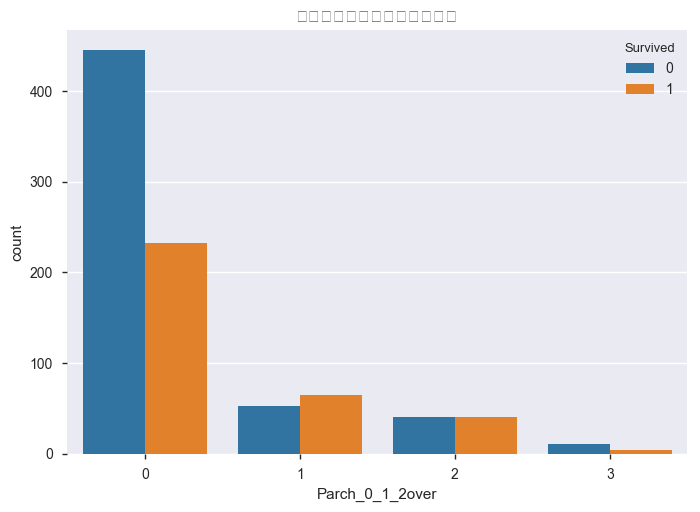

In [258]:
df_train['Parch_0_1_2over']=[i if i<=2 else 3 for i in df_train['Parch']]
df_test['Parch_0_1_2over']=[i if i<=2 else 3 for i in df_test['Parch']]
sns.countplot(x='Parch_0_1_2over', hue='Survived', data=df_train)
plt.title('同乗している両親・子供の数')
display(pd.crosstab(df_train['Parch_0_1_2over'], df_train['Survived']))
display(pd.crosstab(df_train['Parch_0_1_2over'], df_train['Survived'], normalize='index'))

## 同乗している家族の数

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Survived,0,1
IsAlone,,
0,374,163
1,175,179


Survived,0,1
IsAlone,,
0,0.419753,0.182941
1,0.196409,0.200898


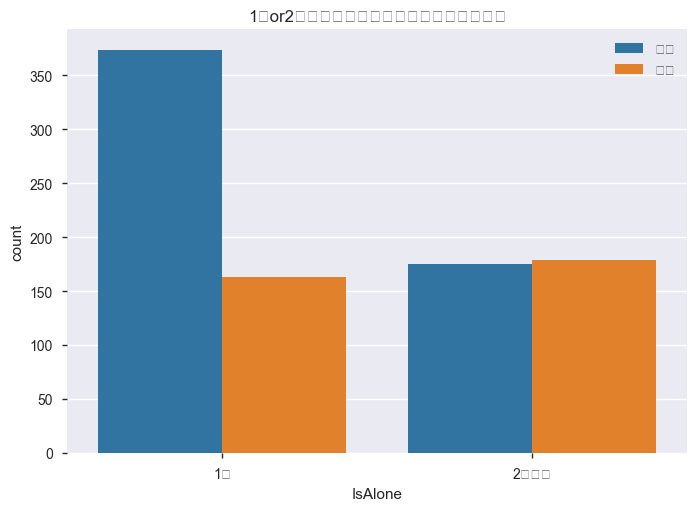

In [259]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = 0 # すべての値を0
df_train.loc[df_train['FamilySize'] >= 2, 'IsAlone'] = 1

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'] = 0 # すべての値を0
df_test.loc[df_test['FamilySize'] >= 2, 'IsAlone'] = 1

sns.countplot(x='IsAlone', hue='Survived', data=df_train)
plt.xticks([0,1], ['1人', '2人以上'])
plt.legend(['死亡', '生存'])
plt.title('1人or2人以上で乗船別の死亡者と生存者の数')
plt.show()

display(pd.crosstab(df_train['IsAlone'], df_train['Survived']))
display(pd.crosstab(df_train['IsAlone'], df_train['Survived'], normalize=True))

## 運賃の分布

Text(0.5, 1.0, '運賃の分布')

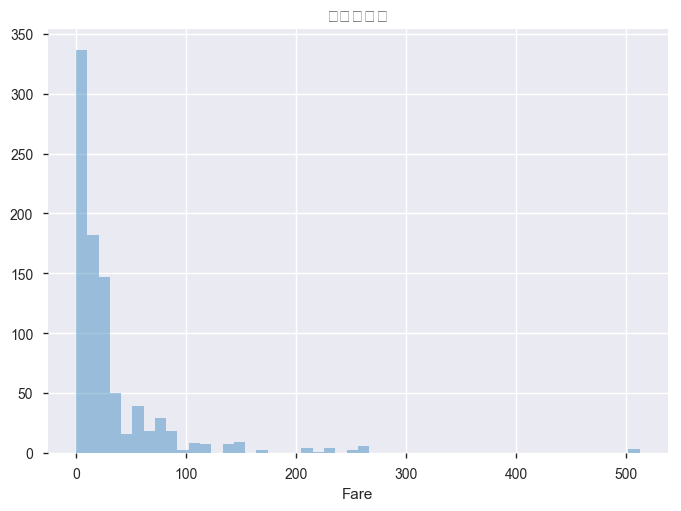

In [260]:
sns.distplot(df_train['Fare'].dropna(), kde=False)
plt.title('運賃の分布')

In [261]:
df_train['CategoricalFare'] = pd.qcut(df_train['Fare'], 4) # 
#df_train[['CategoricalFare'],['Survived']].groupby(['CategoricalFare'], as_index=False).mean()
display(pd.crosstab(df_train['CategoricalFare'], df_train['Survived']))
display(pd.crosstab(df_train['CategoricalFare'], df_train['Survived'], normalize=True))

Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",179,44
"(7.91, 14.454]",156,68
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129


Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",0.200898,0.049383
"(7.91, 14.454]",0.175084,0.076319
"(14.454, 31.0]",0.135802,0.113356
"(31.0, 512.329]",0.104377,0.144781


## 名前

In [262]:
df_test['Name'][:5]

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [263]:
set(df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False)) # strは各要素に対して文字列メソッドを適用, expandはTrueなら絶対DF

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [264]:
import collections
collections.Counter(df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False))

Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'Countess': 1,
         'Jonkheer': 1})

In [265]:
df_train['Title']=df_train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df_test['Title']=df_test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df_train.groupby('Title').mean()['Age']

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [266]:
def title_to_num(title):
    if title == 'Master':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mr':
        return 3
    elif title == 'Mrs':
        return 4
    else:
        return 5
    
df_train['Title_num']=[title_to_num(i) for i in df_train['Title']]
df_test['Title_num']=[title_to_num(i) for i in df_test['Title']]

# 機械学習

## Age補完

In [267]:
display(df_train['Age'].mean())
df_train['Age'] = df_train['Age'].fillna(30)
df_test['Age'] = df_train['Age'].fillna(30)

29.69911764705882

In [268]:
display(df_train[df_train['Embarked'].isnull()])
display(df_train[df_train['Ticket'] == '113572'])
display(df_test[df_test['Ticket'] == '113572'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,SibSp_0_1_2over,Parch_0_1_2over,FamilySize,IsAlone,CategoricalFare,Title,Title_num
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,"(30.263, 40.21]",0,0,1,0,"(31.0, 512.329]",Miss,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,"(60.105, 70.052]",0,0,1,0,"(31.0, 512.329]",Mrs,4


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,SibSp_0_1_2over,Parch_0_1_2over,FamilySize,IsAlone,CategoricalFare,Title,Title_num
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,"(30.263, 40.21]",0,0,1,0,"(31.0, 512.329]",Miss,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,"(60.105, 70.052]",0,0,1,0,"(31.0, 512.329]",Mrs,4


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_0_1_2over,Parch_0_1_2over,FamilySize,IsAlone,Title,Title_num


In [269]:
df_train.loc[[61,829],['Embarked']]= 'C'
df_train[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [270]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_0_1_2over,Parch_0_1_2over,FamilySize,IsAlone,Title,Title_num
152,1044,3,"Storey, Mr. Thomas",male,55.5,0,0,3701,NaN,NaN,S,0,0,1,0,Mr,3


In [271]:
# df_test.loc[152,'Fare']
df_test.loc[df_test['PassengerId'] == 1044, 'Fare'] = 13.675550
df_test.loc[152]

PassengerId                      1044
Pclass                              3
Name               Storey, Mr. Thomas
Sex                              male
Age                              55.5
SibSp                               0
Parch                               0
Ticket                           3701
Fare                          13.6755
Cabin                             NaN
Embarked                            S
SibSp_0_1_2over                     0
Parch_0_1_2over                     0
FamilySize                          1
IsAlone                             0
Title                              Mr
Title_num                           3
Name: 152, dtype: object

In [272]:
display(df_train.isnull().sum())
display(df_test.isnull().sum())

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
CategoricalAge     177
SibSp_0_1_2over      0
Parch_0_1_2over      0
FamilySize           0
IsAlone              0
CategoricalFare      0
Title                0
Title_num            0
dtype: int64

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              327
Embarked             0
SibSp_0_1_2over      0
Parch_0_1_2over      0
FamilySize           0
IsAlone              0
Title                0
Title_num            0
dtype: int64

## カテゴリ変数への変換

In [273]:
genders = {'male': 0, 'female': 1}

df_train['Sex'] = df_train['Sex'].map(genders)
df_test['Sex'] = df_test['Sex'].map(genders)

In [274]:
# ダミー変数化
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])

## 不要な列の削除

In [275]:
df_train.drop(['Name', 'Cabin', 'Ticket', 'Title', 'CategoricalAge', 'CategoricalFare'], axis=1, inplace=True) # inplaceは元のDataframeを変更するか
df_test.drop(['Name', 'Cabin', 'Ticket', 'Title'], axis=1, inplace=True)

# 学習

In [276]:
display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,SibSp_0_1_2over,Parch_0_1_2over,FamilySize,IsAlone,Title_num,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,1,0,2,1,3,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,2,1,4,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1,0,2,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,1,0,2,1,4,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0,3,0,0,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,SibSp_0_1_2over,Parch_0_1_2over,FamilySize,IsAlone,Title_num,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,22.0,0,0,7.8292,0,0,1,0,3,0,1,0
1,893,3,1,38.0,1,0,7.0000,1,0,2,1,4,0,0,1
2,894,2,0,26.0,0,0,9.6875,0,0,1,0,3,0,1,0
3,895,3,0,35.0,0,0,8.6625,0,0,1,0,3,0,0,1
4,896,3,1,35.0,1,1,12.2875,1,1,3,1,4,0,0,1


In [277]:
X_train = df_train.drop(['PassengerId','Survived'], axis=1)
Y_train = df_train['Survived']
X_test = df_test.drop('PassengerId', axis=1).copy()

In [278]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, Y_train)
acc_log = round(forest.score(X_train, Y_train) * 100, 2) # 四捨五入
print(acc_log,'%')

95.85 %


/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 交差検証

In [279]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X_train, Y_train): # Y_trainいる？
    print(len(train_index),len(test_index))
    X_cv_train = X_train.iloc[train_index]
    X_cv_test = X_train.iloc[test_index]
    Y_cv_train = Y_train.iloc[train_index]
    Y_cv_test = Y_train.iloc[test_index]
    forest = RandomForestClassifier(random_state=1)
    forest.fit(X_cv_train, Y_cv_train)
    predictions = forest.predict(X_cv_test)
    
    # print(round(accuracy_score(Y_cv_test, forest.predict(X_cv_test))*100,2))
    print(round(forest.score(X_cv_test, Y_cv_test)*100, 2))

594 297
78.45
594 297
80.81
594 297
80.13


/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [280]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, Y_train)
Y_prediction = forest.predict(X_test)
# 提出データの作成
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_prediction
})
submission.to_csv('submission.csv', index=False)

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0, 0.5, 'Age(年齢)')

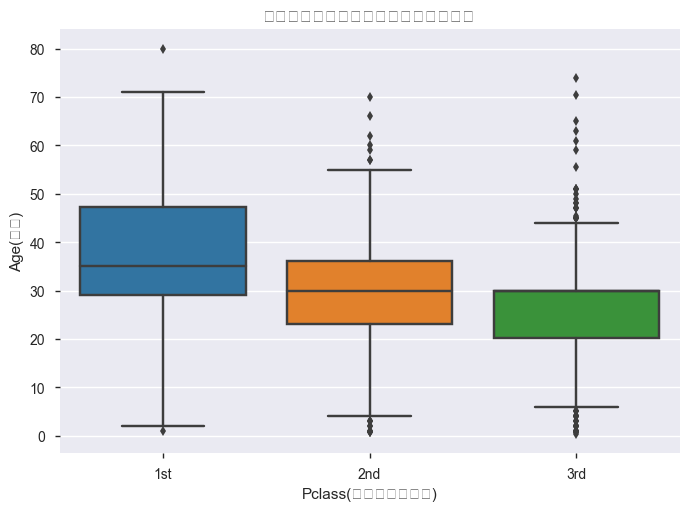

In [281]:
# チケットクラスごとの平均値
sns.boxplot(x='Pclass', y='Age', data=df_train)
plt.xticks([0.0, 1.0, 2.0], ['1st', '2nd', '3rd'])
plt.title('チケットクラスごとの年齢の箱ひげ図')
plt.xlabel('Pclass(チケットクラス)')
plt.ylabel('Age(年齢)')
# 外れ値はIQR(箱ひげの幅)*1.5以上

In [282]:
df_train.groupby('Pclass').mean()['Age']

Pclass
1    37.089907
2    29.884946
3    26.486599
Name: Age, dtype: float64

# チケットクラスの欠損値補完

In [283]:
# df_train[['Age', 'Pclass']].loc[0][0]
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    
df_train['Age'] = df_train[['Age', 'Pclass']].apply(impute_age, axis=1)
df_test['Age'] = df_test[['Age', 'Pclass']].apply(impute_age, axis=1)

## 年齢と運賃データの離散化

In [284]:
[df_train, df_test][0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,SibSp_0_1_2over,Parch_0_1_2over,FamilySize,IsAlone,Title_num,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,1,0,2,1,3,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,2,1,4,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1,0,2,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,1,0,2,1,4,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0,3,0,0,1
5,6,0,3,0,30.0,0,0,8.4583,0,0,1,0,3,0,1,0
6,7,0,1,0,54.0,0,0,51.8625,0,0,1,0,3,0,0,1
7,8,0,3,0,2.0,3,1,21.0750,2,1,5,1,1,0,0,1
8,9,1,3,1,27.0,0,2,11.1333,0,2,3,1,4,0,0,1
9,10,1,2,1,14.0,1,0,30.0708,1,0,2,1,4,1,0,0


In [285]:
data = [df_train, df_test]
for df in data: # 2loops
    df.loc[df['Fare']<=7.91, 'Fare'] = 0
    df.loc[(df['Fare']>7.91)&(df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare']>14.454)&(df['Fare'] <= 31), 'Fare'] = 2
    df.loc[df['Fare']>32, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int) # floatのため
    
    df.loc[df['Age']<=16, 'Age'] = 0
    df.loc[(df['Age']>16)&(df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age']>32)&(df['Age'] <= 48), 'Age'] = 2
    df.loc[df['Age']>48, 'Age'] = 3
    df['Age'] = df['Age'].astype(int) # floatのため

## 特徴量の重要度の確認

In [286]:
for i, k in zip(X_train.columns, forest.feature_importances_):
    print("{}: {}".format(i, round(k, 4)))

Pclass: 0.078
Sex: 0.1931
Age: 0.2322
SibSp: 0.0189
Parch: 0.011
Fare: 0.2352
SibSp_0_1_2over: 0.0164
Parch_0_1_2over: 0.012
FamilySize: 0.0424
IsAlone: 0.0066
Title_num: 0.1222
Embarked_C: 0.0104
Embarked_Q: 0.0047
Embarked_S: 0.0168


In [287]:
df_train.drop(['SibSp', 'Parch', 'SibSp_0_1_2over', 'Parch_0_1_2over'], axis=1, inplace=True)
df_test.drop(['SibSp', 'Parch', 'SibSp_0_1_2over', 'Parch_0_1_2over'], axis=1, inplace=True)

df_train['Embarked'] = 0
df_test['Embarked'] = 0
data = [df_train, df_test]
for df in data:
    df.loc[df['Embarked_C'] == 1, 'Embarked'] = 1
    df.loc[df['Embarked_Q'] == 1, 'Embarked'] = 2
    
df_train.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)
df_test.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1, inplace=True)

In [288]:
X_train = df_train.drop(['PassengerId','Survived'], axis=1)
Y_train = df_train['Survived']
X_test = df_test.drop('PassengerId', axis=1).copy()

In [289]:
X_test.head()

,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Title_num,Embarked
0,3,0,1,0,1,0,3,2
1,3,1,2,0,2,1,4,0
2,2,0,1,1,1,0,3,2
3,3,0,2,1,1,0,3,0
4,3,1,2,1,3,1,4,0


In [290]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)
# 提出データの作成
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred
})
submission.to_csv('submission_2.csv', index=False)

/Users/kyohei/.pyenv/versions/3.6.5/envs/deeplearning/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [291]:
for i, k in zip(X_train.columns, forest.feature_importances_):
    print("{}: {}".format(i, round(k, 4)))

Pclass: 0.1263
Sex: 0.3294
Age: 0.075
Fare: 0.1138
FamilySize: 0.1158
IsAlone: 0.0189
Title_num: 0.1657
Embarked: 0.055


# pandas-profiling

In [292]:
import pandas_profiling as pdp
df_train = pd.read_csv('./input/train.csv')
pdp.ProfileReport(df_train)
# interquartile range 四分位範囲 第三四分位点-第一四分位点
# range 最大値-最小値

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [293]:
import lightgbm as lgb

df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
df_gender_submission = pd.read_csv('./input/gender_submission.csv')


genders = {'male': 0, 'female':1}

df_train['Sex'] = df_train['Sex'].map(genders)
df_test['Sex'] = df_test['Sex'].map(genders)

df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])

test_passengerId = df_test['PassengerId']

df_train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

df_train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
5,0,3,0,NaN,0,0,8.4583,0,1,0


In [294]:
X_train = df_train.iloc[:, 1:] # Survivedのカラム以外
Y_train = df_train['Survived']

kf = KFold(n_splits=3)

params = {
    'objective': 'binary',
    'learning_rate': 0.1,
    'num_leaves': 300
}

for train_index, test_index in kf.split(X_train, Y_train):
    X_cv_train = X_train.iloc[train_index]
    X_cv_test = X_train.iloc[test_index]
    Y_cv_train = Y_train.iloc[train_index]
    Y_cv_test = Y_train.iloc[test_index]
    
    gbm = lgb.LGBMClassifier(objective='binary',
                            num_leaves = 300,
                            learning_rate = 0.1,
                            )
    
    gbm.fit(X_cv_train, Y_cv_train,
           eval_set = [(X_cv_test, Y_cv_test)],
           early_stopping_rounds=10,
           )
    
    Y_pred = gbm.predict(X_cv_test, num_iteration=gbm.best_iteration_)
    print(round(gbm.score(X_cv_test, Y_cv_test)*100, 2))
    
Y_pred = gbm.predict(df_test, num_iteration=gbm.best_iteration_)

# 提出データの作成
submission = pd.DataFrame({
    'PassengerId': test_passengerId,
    'Survived': Y_pred
})
submission.to_csv('submission_lgb.csv', index=False)

[1]	valid_0's binary_logloss: 0.620239
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.593798
[3]	valid_0's binary_logloss: 0.572528
[4]	valid_0's binary_logloss: 0.554015
[5]	valid_0's binary_logloss: 0.539266
[6]	valid_0's binary_logloss: 0.527844
[7]	valid_0's binary_logloss: 0.518635
[8]	valid_0's binary_logloss: 0.510455
[9]	valid_0's binary_logloss: 0.504106
[10]	valid_0's binary_logloss: 0.498639
[11]	valid_0's binary_logloss: 0.493381
[12]	valid_0's binary_logloss: 0.490238
[13]	valid_0's binary_logloss: 0.486524
[14]	valid_0's binary_logloss: 0.484927
[15]	valid_0's binary_logloss: 0.482375
[16]	valid_0's binary_logloss: 0.481922
[17]	valid_0's binary_logloss: 0.480232
[18]	valid_0's binary_logloss: 0.475995
[19]	valid_0's binary_logloss: 0.47274
[20]	valid_0's binary_logloss: 0.469822
[21]	valid_0's binary_logloss: 0.468911
[22]	valid_0's binary_logloss: 0.469166
[23]	valid_0's binary_logloss: 0.469686
[24]	valid_0's binary_loglos

In [295]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
